In [141]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [151]:
#import video and create video object
video = cv2.VideoCapture("airplanes.mp4")
vidsize = (int(video.get(3)), int(video.get(4)))
rows,cols = vidsize
total_pixels = rows * cols
#Add codec
#fourcc = cv2.VideoWriter_fourcc(*'VP90')

#out_vid = cv2.VideoWriter("output.webm",fourcc, 24.0, vidsize, 0)

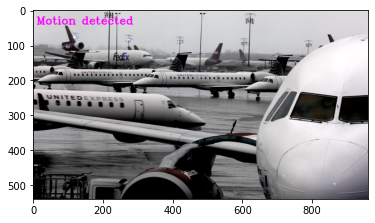

In [152]:
#capturing frames

#ret, frame1 = video.read()
#ret, frame2 = video.read()
#plt.imshow(frame2)
bg_frame = None 

while True:

    ret,frame10 = video.read()

    if not ret:
        break
    
    gray_frame = cv2.cvtColor(frame10,cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray_frame,(95,95),0)

    if bg_frame is None:
        bg_frame = gray_blur
        continue

    diff = cv2.absdiff(bg_frame,gray_blur)

    _,thresh = cv2.threshold(diff, 30, 255,cv2.THRESH_BINARY)

    white_pixel = np.sum(thresh)/255

    if(white_pixel > 0.1*total_pixels):
        cv2.putText(frame10, "Motion detected",(10,40),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,255),2)
        break
plt.imshow(frame10)

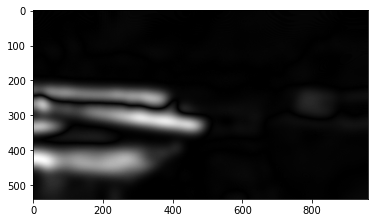

In [153]:
plt.imshow(diff,cmap='gray')

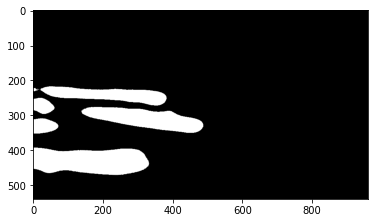

In [154]:
plt.imshow(thresh,cmap='gray')

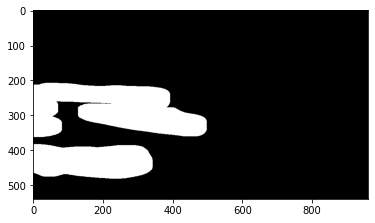

In [155]:
dilate = cv2.dilate(thresh,None , iterations=10)
plt.imshow(dilate,cmap='gray')

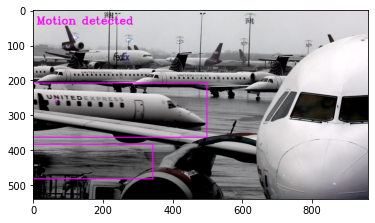

In [156]:
contours , _ = cv2.findContours(dilate,1,2)
display = frame10.copy()

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)

    cv2.rectangle(display,(x,y),(x+w,y+h),(255,0,255),2)
plt.imshow(display)

In [157]:
final = cv2.imwrite("/home/abh300/New_Virtual/Motion_in_video/movement.jpg",display)
cv2.destroyAllWindows()